In [7]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')


tokenizer = AutoTokenizer.from_pretrained('klue/roberta-small')

df = pd.read_csv('C:/Users/ADMIN/Documents/수업파일/221228(Final)/전처리단계/clean_total_crawling10.1.csv') 
# df = pd.read_csv('./data/train.csv')
# test = pd.read_csv('./data/test.csv')

df['tok'] = df['reviews'].apply(lambda x : tokenizer.tokenize(x))
df['tok_len'] = df['tok'].apply(lambda x : len(x))
# test['tok'] = test['문장'].apply(lambda x : tokenizer.tokenize(x))
# test['tok_len'] = test['tok'].apply(lambda x : len(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (517 > 512). Running this sequence through the model will result in indexing errors


Train max length : 2679


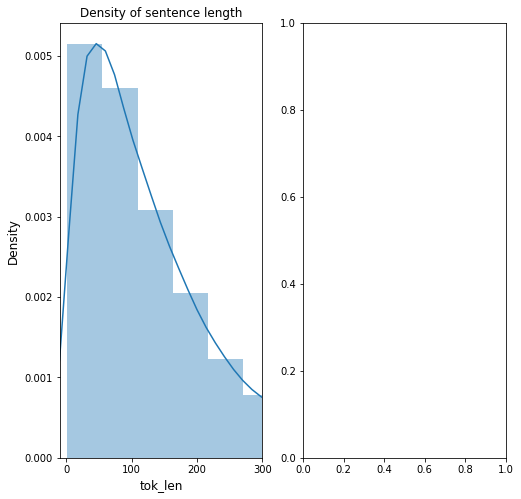

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

g = sns.distplot(df['tok_len'], ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=12)
axes[0].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[0].set_xlim(-10, 300)
axes[0].set_title('Density of sentence length')


# g = sns.distplot(test['tok_len'], ax=axes[1])
# axes[1].set_xlabel(g.get_xlabel(), fontsize=12)
# axes[1].set_ylabel(g.get_ylabel(), fontsize=12) 
# axes[0].set_xlim(-10, 300)
# axes[1].set_title('Density of sentence length')

print(f"Train max length : {max(df['tok_len'])}")
# print(f"TeST max length : {max(test['tok_len'])}")

In [9]:
df.head(5)

,Column1,reviews,keyword_kor,keyword_num,글자수,tok,tok_len
0,65928,냄새안나고 맛있어요,곱창,1,10,"[냄새, ##안, ##나, ##고, 맛있, ##어요]",6
1,65940,부추된장찌개랑 양밥,곱창,1,10,"[부추, ##된, ##장, ##찌개, ##랑, 양, ##밥]",7
2,66081,곱창과 전골을 추천,곱창,1,10,"[곱창, ##과, 전골, ##을, 추천]",5
3,66191,생각만큼은 아니었다,곱창,1,10,"[생각, ##만큼, ##은, 아니, ##었, ##다]",6
4,66725,망원 청어람 볶음밥,곱창,1,10,"[망원, 청, ##어, ##람, 볶음밥]",5


In [10]:
df.describe()

,Column1,keyword_num,글자수,tok_len
count,55042.000000,55042.000000,55042.000000,55042.000000
mean,35065.839286,9.787399,283.717161,148.205389
std,19857.392141,4.901508,308.002918,159.697186
min,0.000000,1.000000,10.000000,2.000000
25%,19167.250000,5.000000,96.000000,51.000000
50%,34711.500000,10.000000,197.000000,104.000000
75%,51762.750000,15.000000,362.000000,190.000000
max,71636.000000,17.000000,5079.000000,2679.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55042 entries, 0 to 55041
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column1      55042 non-null  int64 
 1   reviews      55042 non-null  object
 2   keyword_kor  55042 non-null  object
 3   keyword_num  55042 non-null  int64 
 4   글자수          55042 non-null  int64 
 5   tok          55042 non-null  object
 6   tok_len      55042 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ MB


In [ ]:
label_df = pd.read_csv('./data/train.csv')
label_df.columns = ['Column1', 'reviews', 'keyword_kor', 'keyword_num','글자수', 'tok' , 'tok_len']
# type_dict = {"사실형" : "Tr", "추론형" : "Guess", "대화형" : "Talk", "예측형" : "Predict"}
# polarity_dict = {"긍정" : "Pos", "부정" : "Neg" , "미정" : "No"}
# tense_dict = {"과거" : "Past", "현재" : "present", "미래" : "Future"}
# certainty_dict = {"확실" : "Sure", "불확실" : "nosure"}

# label_df['type'] = label_df['type'].apply(lambda x : type_dict[x])
# label_df['polarity'] = label_df['polarity'].apply(lambda x : polarity_dict[x])
# label_df['tense'] = label_df['tense'].apply(lambda x : tense_dict[x])
# label_df['certainty'] = label_df['certainty'].apply(lambda x : certainty_dict[x])

def make_label(type,polarity,tense,certainty):
    return f"{type}-{polarity}-{tense}-{certainty}"

label_df['label_eng'] = label_df.apply(lambda x : make_label(x['type'],x['polarity'],x['tense'],x['certainty']), axis =1 , result_type = 'expand')